#Projeto de regressão com Keras

Alunos:

Natan Santos Bastos - 125111373706

Pedro Henrique Gil Antunes - 125111378102

Pedro Henrique Silva Torres Souza - 125111357179

Este conjunto de dados é uma coleção de métricas-chave mantidas pelo Our World in Data (https://ourworldindata.org) e contem dados sobre consumo de energia (energia primária, per capita e taxas de crescimento), mix de energia, mix de eletricidade e outras métricas relevantes.

Para esse projeto escolhemos a geração de energia sobre o carvão.

Dataset:

https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption

#Os dados

Aqui pegamos apenas as Features(colunas) que queriamos, no caso todos sobre carvão.

*   coal_share_elec - Parcela do consumo de eletricidade proveniente do carvão
*   coal_cons_change_pct  - Alteração percentual anual no consumo de carvão
*   coal_share_energy - Parcela do consumo de energia primária proveniente do carvão
*   coal_cons_change_twh - Mudança anual no consumo de carvão, medida em terawatts-hora
*   coal_consumption - Consumo de energia primária do carvão, medido em terawatts-hora
*   coal_elec_per_capita - Consumo per capita de eletricidade a partir do carvão, medido em quilowatts-hora
*   coal_cons_per_capita - Consumo de energia primária per capita de carvão, medido em quilowatts-hora
*   coal_production - Produção de carvão, medida em terawatts-hora
*   coal_prod_per_capita - Produção de carvão per capita, medida em quilowatts-hora
*   electricity_generation - Geração de eletricidade, medida em terawatt-hora
*   coal_prod_change_pct - Alteração percentual anual na produção de carvão
*   coal_prod_change_twh - Mudança anual na produção de carvão, medida em terawatts-hora
*   coal_electricity - Geração de eletricidade a partir do carvão, medida em terawatts-hora


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('World Energy Consumption.csv')

#Análise exploratória de dados

In [ ]:
df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['coal_cons_change_pct',
'coal_cons_change_twh',
'coal_cons_per_capita',
'coal_consumption',
'coal_elec_per_capita',
'coal_electricity',
'coal_prod_change_pct',
'coal_prod_change_twh',
'coal_prod_per_capita',
'coal_production',
'coal_share_elec',
'coal_share_energy',
'electricity_generation',
'year']]

In [ ]:
df.isnull().sum()

coal_cons_change_pct      13670
coal_cons_change_twh      13225
coal_cons_per_capita      13142
coal_consumption          12262
coal_elec_per_capita      12673
coal_electricity          12333
coal_prod_change_pct       9987
coal_prod_change_twh       7038
coal_prod_per_capita       7779
coal_production            6803
coal_share_elec           12376
coal_share_energy         13148
electricity_generation    11313
year                          0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
coal_cons_change_pct,3762.0,29.726540,941.553610,-100.000,-5.24650,1.1860,7.73325,55400.000
coal_cons_change_twh,4207.0,12.478986,141.579781,-1110.262,-1.03300,0.0000,3.89600,2551.865
coal_cons_per_capita,4290.0,5920.463850,8937.954388,0.000,223.54725,2425.5890,8248.95275,96109.692
coal_consumption,5170.0,894.623199,3800.362116,0.000,2.37075,31.7875,200.20950,44993.467
coal_elec_per_capita,4759.0,628.544332,1353.593081,0.000,0.00000,0.0000,482.80150,9110.145
coal_electricity,5099.0,139.986396,718.368446,0.000,0.00000,0.0000,17.81300,9345.341
coal_prod_change_pct,7445.0,20.830774,697.178744,-100.000,-1.53200,0.0000,7.69000,44965.754
coal_prod_change_twh,10394.0,8.798102,135.503698,-2326.870,0.00000,0.0000,0.33400,3060.593
coal_prod_per_capita,9653.0,3445.148731,9891.799034,0.000,0.00000,13.8000,1886.84900,150849.824
coal_production,10629.0,471.205498,2611.404074,0.000,0.00000,0.2930,42.72500,46548.716


## Trabalhando com os dados das características

In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.head()

,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_generation,year
0,3.181,24.268,1434.796,787.167,254.298,139.514,6.244,70.458,2185.299,1198.912,53.869,35.400,258.986,1985
1,2.311,18.190,1427.110,805.357,251.766,142.078,2.551,30.581,2178.688,1229.492,52.600,35.372,270.110,1986
2,2.851,22.964,1427.095,828.320,262.269,152.227,0.104,1.284,2120.477,1230.776,54.317,35.295,280.260,1987
3,7.466,61.841,1491.435,890.162,255.423,152.449,2.775,34.157,2119.351,1264.932,51.626,35.370,295.296,1988
4,-6.127,-54.540,1362.030,835.622,256.247,157.211,-2.884,-36.481,2002.327,1228.451,51.267,33.100,306.648,1989


### HeatMap de correlação

<Axes: >

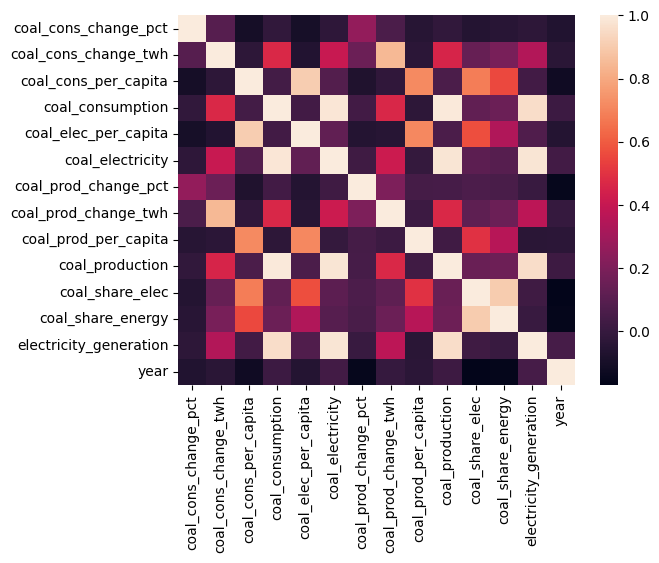

In [ ]:
sns.heatmap(df.corr())

<Figure size 1200x800 with 0 Axes>

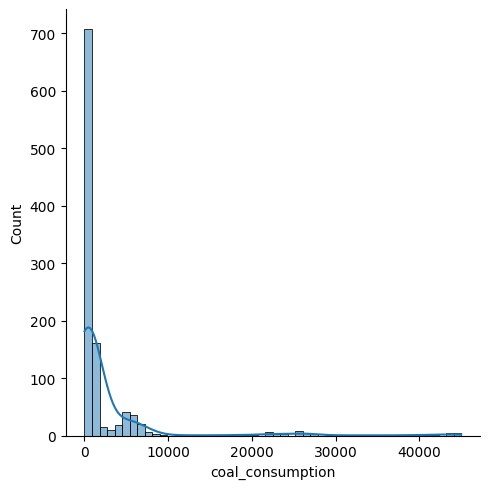

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df['coal_consumption'], kde=True, bins=50)


<Axes: xlabel='coal_consumption', ylabel='coal_production'>

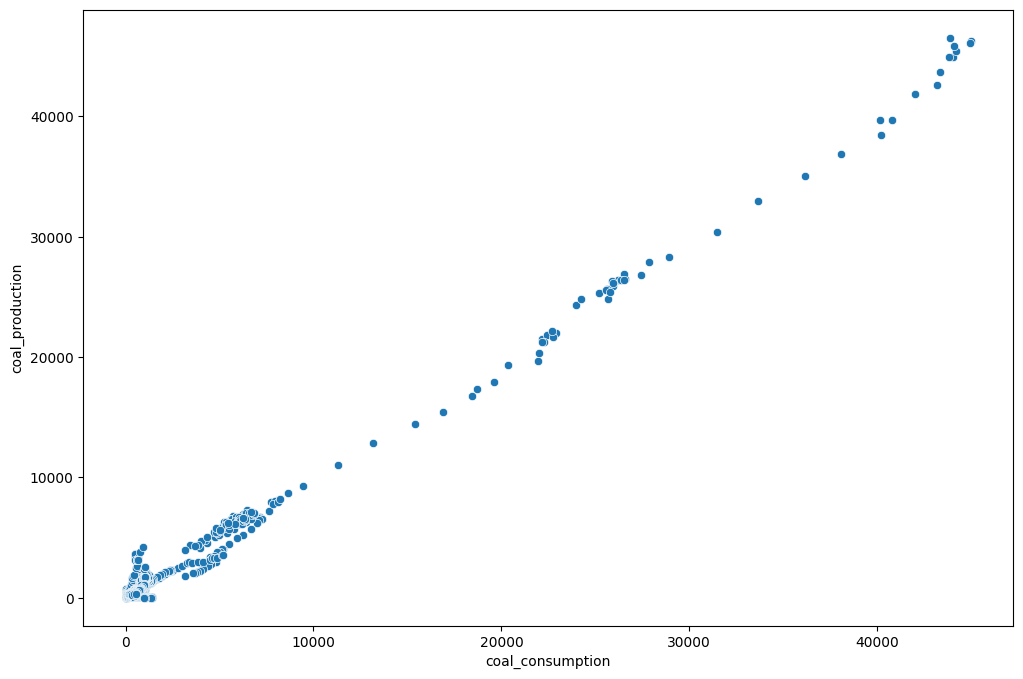

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='coal_consumption', y='coal_production', data=df)

In [ ]:
df.sort_values('coal_consumption', ascending=True).head(20)

,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_generation,year
986,-100.000,-0.501,0.000,0.000,0.000,0.000,15.324,9.146,2647.623,68.830,0.000,0.000,96.216,2004
984,-62.687,-0.357,8.456,0.212,0.000,0.000,5.332,3.481,2739.771,68.768,0.000,0.026,86.646,2002
985,136.006,0.289,19.604,0.501,0.000,0.000,-13.210,-9.084,2335.788,59.684,0.000,0.068,89.267,2003
983,-62.983,-0.968,23.080,0.569,0.000,0.000,-2.411,-1.613,2649.005,65.287,0.000,0.070,87.733,2001
1000,-34.351,-0.459,30.790,0.878,0.000,0.000,49.102,0.844,89.884,2.563,0.000,0.142,89.160,2019
999,-9.449,-0.140,46.299,1.337,0.000,0.000,-48.979,-1.650,59.510,1.719,0.000,0.196,96.665,2018
997,-9.626,-0.153,48.066,1.435,0.000,0.000,-49.242,-3.352,115.734,3.455,0.000,0.173,104.654,2016
998,2.942,0.042,50.235,1.477,0.000,0.000,-2.473,-0.085,114.595,3.369,0.000,0.186,100.581,2017
982,262.006,1.112,63.521,1.537,0.000,0.000,19.575,10.952,2765.396,66.900,0.000,0.199,83.240,2000
996,-30.740,-0.705,52.777,1.588,0.000,0.000,0.132,0.009,226.259,6.806,0.000,0.173,119.181,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coal_cons_change_pct    1071 non-null   float64
 1   coal_cons_change_twh    1071 non-null   float64
 2   coal_cons_per_capita    1071 non-null   float64
 3   coal_consumption        1071 non-null   float64
 4   coal_elec_per_capita    1071 non-null   float64
 5   coal_electricity        1071 non-null   float64
 6   coal_prod_change_pct    1071 non-null   float64
 7   coal_prod_change_twh    1071 non-null   float64
 8   coal_prod_per_capita    1071 non-null   float64
 9   coal_production         1071 non-null   float64
 10  coal_share_elec         1071 non-null   float64
 11  coal_share_energy       1071 non-null   float64
 12  electricity_generation  1071 non-null   float64
 13  year                    1071 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 1

<Axes: xlabel='coal_consumption'>

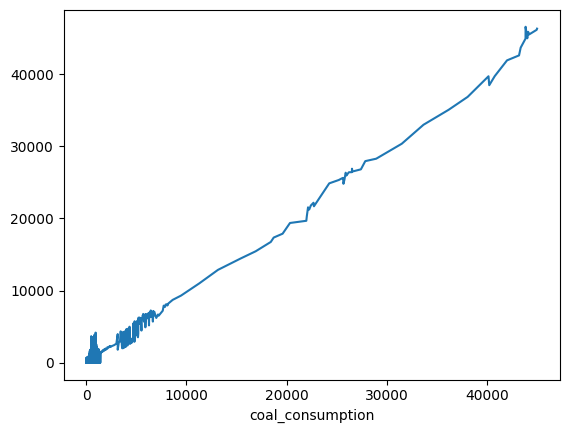

In [ ]:
df.groupby('coal_consumption').mean()['coal_production'].plot()

## Normalização e train/test split

In [ ]:
x= df.drop('coal_consumption', axis=1)
y= df['coal_consumption'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train ,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Criando modelo usando rede neural


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
x_train.shape

(749, 13)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=14,activation = 'relu'))
model.add(Dense(units=14,activation = 'relu'))
model.add(Dense(units=14,activation = 'relu'))
model.add(Dense(units=14,activation = 'relu'))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mse',optimizer='adam')

#Treinando modelo

In [ ]:
model.fit(x= x_train, y=y_train, epochs=700, batch_size=128, validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
6/6 [==============================] - 0s 14ms/step - loss: 169415.3438 - val_loss: 252788.7656
Epoch 2/700
6/6 [==============================] - 0s 8ms/step - loss: 169565.6250 - val_loss: 248310.0625
Epoch 3/700
6/6 [==============================] - 0s 8ms/step - loss: 169302.7031 - val_loss: 244230.4062
Epoch 4/700
6/6 [==============================] - 0s 8ms/step - loss: 168638.7969 - val_loss: 249932.3281
Epoch 5/700
6/6 [==============================] - 0s 9ms/step - loss: 168163.1250 - val_loss: 252377.0156
Epoch 6/700
6/6 [==============================] - 0s 8ms/step - loss: 168554.9844 - val_loss: 252529.6719
Epoch 7/700
6/6 [==============================] - 0s 11ms/step - loss: 168966.2031 - val_loss: 238774.9844
Epoch 8/700
6/6 [==============================] - 0s 11ms/step - loss: 168553.7344 - val_loss: 250040.8906
Epoch 9/700
6/6 [==============================] - 0s 7ms/step - loss: 167232.2188 - val_loss: 244344.6719
Epoch 10/700
6/6 [================

In [ ]:
model_loss= pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,169415.343750,252788.765625
1,169565.625000,248310.062500
2,169302.703125,244230.406250
3,168638.796875,249932.328125
4,168163.125000,252377.015625
...,...,...
695,72172.000000,67884.218750
696,72037.828125,64791.765625
697,71920.312500,66598.320312
698,71660.851562,64412.578125


<Axes: >

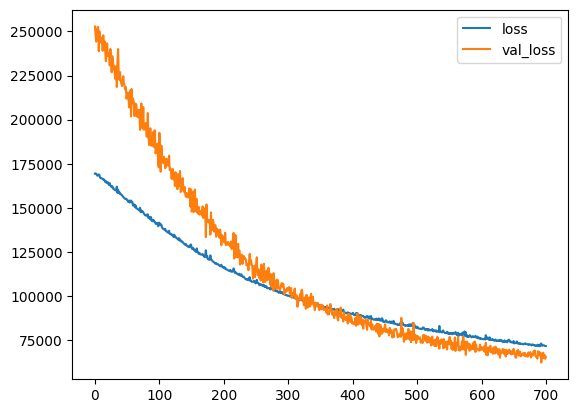

In [ ]:
model_loss.plot()

# Avaliando dados de teste

#### Prevendo em dados novos

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

predictions = model.predict(x_test)

11/11 [==============================] - 0s 1ms/step


#### ERRO ABSOLUTO (MAE)

In [ ]:
mean_absolute_error(y_test, predictions)

167.89664281221948

#### ERRO QUADRÁTICO (MSE)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

255.84827519905855

#### TAXA DE PREVISÃO

In [ ]:
explained_variance_score(y_test, predictions)

0.9983838382430987

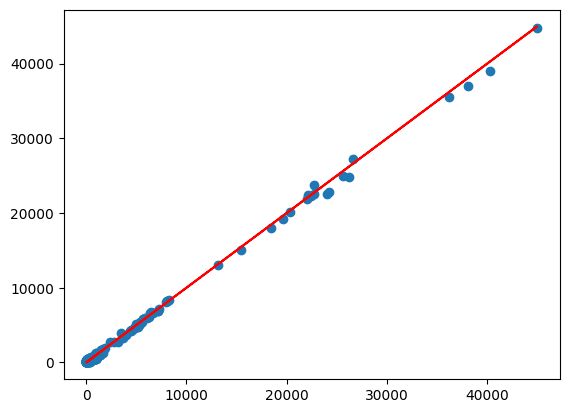

In [ ]:
# Nossas previsões
plt.scatter(y_test, predictions)

# Previsões perfeitas
plt.plot(y_test,y_test,'r')

In [ ]:
errors = y_test.reshape(322, 1) - predictions

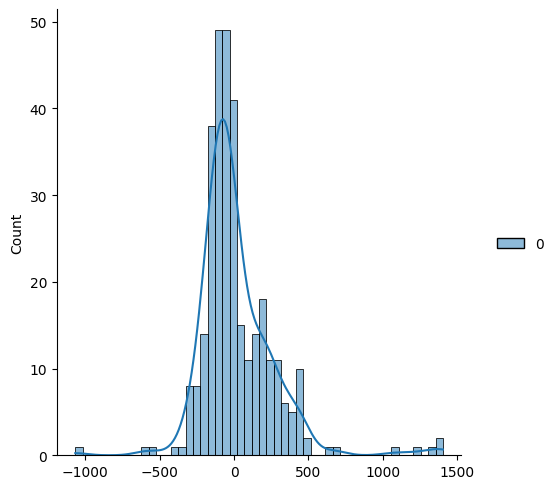

In [ ]:
sns.displot(errors,bins=50,kde=True)

### Prevendo o consumo


In [ ]:
consumption = df.drop('coal_consumption',axis=1).iloc[0]

In [ ]:
consumption

coal_cons_change_pct         3.181
coal_cons_change_twh        24.268
coal_cons_per_capita      1434.796
coal_elec_per_capita       254.298
coal_electricity           139.514
coal_prod_change_pct         6.244
coal_prod_change_twh        70.458
coal_prod_per_capita      2185.299
coal_production           1198.912
coal_share_elec             53.869
coal_share_energy           35.400
electricity_generation     258.986
year                      1985.000
Name: 0, dtype: float64

In [ ]:
consumption = scaler.transform(consumption.values.reshape(-1, 13))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.predict(consumption)

1/1 [==============================] - 0s 20ms/step


array([[770.27515]], dtype=float32)

In [ ]:
df.iloc[0]

coal_cons_change_pct         3.181
coal_cons_change_twh        24.268
coal_cons_per_capita      1434.796
coal_consumption           787.167
coal_elec_per_capita       254.298
coal_electricity           139.514
coal_prod_change_pct         6.244
coal_prod_change_twh        70.458
coal_prod_per_capita      2185.299
coal_production           1198.912
coal_share_elec             53.869
coal_share_energy           35.400
electricity_generation     258.986
year                      1985.000
Name: 0, dtype: float64

#Conclusão

Com base em nossa análise, concluímos que o modelo de regressão com a rede neural implementado com Keras foi capaz de capturar as relações entre as variáveis de entrada e o consumo de carvão para gerar energia. O modelo mostrou-se capaz de fazer previsões confiáveis e úteis para apoiar a tomada de decisões relacionadas ao consumo de carvão em usinas de energia.

Durante o processo de treinamento, otimizamos os parâmetros da rede neural para minimizar o erro entre as previsões do modelo e os valores reais do consumo de carvão. Utilizamos métricas de avaliação, como o erro médio quadrático (MSE), erro médio absoluto (MAE) para avaliar o desempenho do modelo. Além disso, dividimos os dados em conjuntos de treinamento e teste para verificar se o modelo era capaz de generalizar seus conhecimentos para novos dados.